In [1]:
import pandas as pd
import numpy as np

# visualizing
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=12)

# preparing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modeling and evaluating
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

# acquiring
from explore import anatomy_of_a_figure
from pydataset import data

## Classification

___

### <font color=red>What is Classification?</font>

**Classification is a Supervised Machine Learning technique.** Like Regression, Classification also uses labeled data from a training dataset to learn rules for making future predictions on unseen data. However, **Classification is used to predict the category membership of the target value (label).** For Classification algorithms, you determine the probability of an observation to be part of a certain class or not. Therefore, you express the probability with a value between 0 and 1. A probability close to 1 means the observation is very likely to be part of a category.

**Simply put, Regression predicts a continuous variable while classification predicts a categorical variable.**

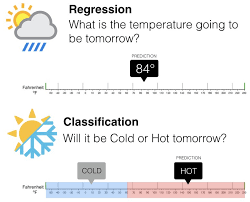

___

### <font color=orange>So What Are the Types of Classification?</font>

**Types of Classification**

>**Binary Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of only two groups: churn/not churn, pass/fail, male/female, smoker/non-smoker, healthy/sick.

>**Multiclass Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of three or more possible groups or categories: A/B/C, hot/warm/cold, Python/Java/C++/Go/C

![image.png](https://developers.google.com/machine-learning/guides/text-classification/images/LastLayer.png)

**Uses for Classification**

- Medical Diagnosis


- Spam Detection


- Credit Approval


- Targeted Marketing

___

### <font color=green>Now What?</font>

Check out [this article](https://towardsdatascience.com/the-complete-guide-to-classification-in-python-b0e34c92e455) on Classification and Logistic Regression. Glean what is helpful to you, and don't feel like you need to understand anything we haven't covered yet unless you are so interested.

We will work through the data science pipeline focused on preparing for Classification Modeling.

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## Acquire

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

**<font color=green>A Few Example Methods for Reading Data into Pandas DataFrames</font>**

___

### Create your DataFrame using a csv file

```python
df = pd.read_csv(url)
```

In [2]:
url = 'https://raw.githubusercontent.com/faithkane3/faithkane3.github.io/master/titanic_df.csv'
titanic_df = pd.read_csv(url, index_col=0)

In [3]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


___

### Create a DataFrame Using Seaborn Datasets

More data to practice with later.

In [4]:
# Using Seaborn Datasets

iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


___

**Other Seaborn Datasets you can use are linked [here](https://github.com/mwaskom/seaborn-data)**

**More on sklearn dataset loading utilities [here](https://scikit-learn.org/stable/datasets/index.html)**

<hr style="border-top: 10px groove goldenrod; margin-top: 1px; margin-bottom: 1px"></hr>

## Preparation - Imputing and Encoding Focus

<hr style="border-top: 10px groove goldenrod; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What are Imputing and Encoding?</font>**

**Imputation** is the process of replacing missing data with substituted values. You might choose to impute the mean, median, or mode of a given column to fill any holes or cells with missing data. Maybe you want to do something a little more complex like use a linear regression model to predict the missing values that you will impute. Depending on the situation, you might just decide to drop rows or columns that have more than a certain percentage of missing values. Whatever you decide to do, you first need to inspect your dataset for Null values.

**Encoding** is when you convert a string to an integer representation making a categorical value useable in a ML model.

**<font color=purple>I'll demonstrate a few different techniques to handle these tasks below.</font>**

___

### **<font color=orange>So What Are They For?</font>**

**Both imputing and encoding our data is part of preparing it for use in Machine Learning models.**

The simplest way to encode a categorical variable is with the pandas function `pd.get_dummies()`, so we'll look at that first. I perform this manipulation before I split. This is a great technique to start with and perfect place to build your understanding of encoding data.

**The encoding techniques below are performed after I split my data, so I will demonstrate them later in the notebook.**

Encoding with `LabelEncoder()` converts each unique value in your chosen column into an integer representing the original categorical value. **This technique is useful when there is meaning to the order of your categorical values, or in other words, for ordinal values..**

One-hot Encoding is when we create a new column for each value in the oringinal column we wish to encode. Each observation in our DataFrame will have either a 0 or a 1 to indicate which of the new columns represents its value in the original column. **This is useful when the order of your categorical values does not carry meaning, or in other words, for nominal values.** Beware of the curse of dimensionality when using One-hot; it can quickly increase the number of columns, and therfore complexity, of your model exponentially.

Take a deeper look at these various techniques [in this arcticle](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) and [in this beginner's guide to encoding data](https://towardsdatascience.com/beginners-guide-to-encoding-data-5515da7f56ab).

___

### **<font color=green>Now What?</font>**

**Let's take a look at our data and decide what variables may need imputing, encoding, or just dropped. I might also decide to create new columns in prepare.**

#### `.map()` to Create Column

I'm adding a column here, `is_female`, and demonstrating how I could do that using `df.map()`.

In [5]:
titanic_df['is_female'] = titanic_df.sex.map({'female': 1, 'male': 0})

titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,is_female
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,1
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,1


___

#### `.isna()` and `.isnull()`

I'll quickly check my dataset for missing values:

>**<font color=purple>Here's a cool way to use a heatmap to visualize Null values in your dataset.</font>**

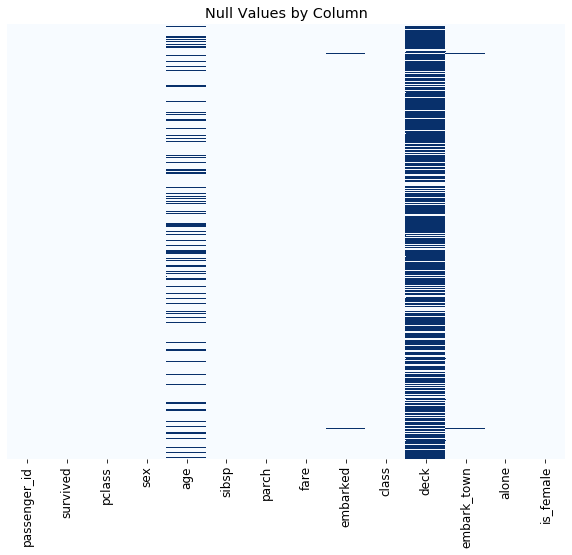

In [6]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column')
plt.show()

**Examine total missing values by column; this can help me make some decisions about imputing and dropping.**

In [7]:
titanic_df.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
is_female         0
dtype: int64

**Examine percent of missing values by column; I can begin to decide how to handle my missing values based on this.**

In [8]:
round(titanic_df.isna().mean() * 100, 2)

passenger_id     0.00
survived         0.00
pclass           0.00
sex              0.00
age             19.87
sibsp            0.00
parch            0.00
fare             0.00
embarked         0.22
class            0.00
deck            77.22
embark_town      0.22
alone            0.00
is_female        0.00
dtype: float64

**I can check any missing values by subgroups if I really want to dig down.**

In [9]:
titanic_df.groupby(['survived', 'pclass', 'sex']).agg(lambda s: s.isna().sum())

passenger_id   age  sibsp  parch  fare  embarked  \
survived pclass sex                                                        
0        1      female             0   0.0      0      0   0.0         0   
                male               0  16.0      0      0   0.0         0   
         2      female             0   0.0      0      0   0.0         0   
                male               0   7.0      0      0   0.0         0   
         3      female             0  17.0      0      0   0.0         0   
                male               0  85.0      0      0   0.0         0   
1        1      female             0   9.0      0      0   0.0         2   
                male               0   5.0      0      0   0.0         0   
         2      female             0   2.0      0      0   0.0         0   
                male               0   2.0      0      0   0.0         0   
         3      female             0  25.0      0      0   0.0         0   
                male               0   9.0      0      0   0.0         0   

                        class  deck  embark_town  alone  is_female  
survived pclass sex                                                 
0        1      female      0     0            0      0          0  
                male        0    22            0      0          0  
         2      female      0     5            0      0          0  
                male        0    89            0      0          0  
         3      female      0    70            0      0          0  
                male        0   296            0      0          0  
1        1      female      0    13            2      0          0  
                male        0     6            0      0          0  
         2      female      0    61            0      0          0  
                male        0    13            0      0          0  
         3      female      0    68            0      0          0  
                male        0    45            0      0          0

___

### Encoding Technique Before Splitting

#### `pd.get_dummies()` 

Remeber that I perform this manipulation here before I split my data. This is a simple way to encode categorical variables, and we will look at some more sophisticated techniques a bit farther down.

In [10]:
# First I create a new dataframe that holds my encoded columns.

embarked_dummies = pd.get_dummies(titanic_df.embarked, drop_first=True)
embarked_dummies.sample(5)

,Q,S
616,0,1
836,0,1
493,0,0
234,0,1
385,0,1


In [11]:
# Then I add my encoded columns back onto my original dataframe.

titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)

In [12]:
titanic_df.sample(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,is_female,Q,S
295,295,0,1,male,NaN,0,0,27.7208,C,First,NaN,Cherbourg,1,0,0,0
508,508,0,3,male,28.0,0,0,22.5250,S,Third,NaN,Southampton,1,0,0,1


___

#### `.drop()`

If I'm going to drop any columns or rows, I can do it right here before the split. There are some categorical columns I'm not dropping because I want to use them in explore. I'm choosing to keep my dataframe exploration-friendly, and I can curate columns for modeling later.

In [13]:
titanic_df = titanic_df.drop(columns=['deck', 'passenger_id', 'embarked'])
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   class        891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    int64  
 10  is_female    891 non-null    int64  
 11  Q            891 non-null    uint8  
 12  S            891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(2)
memory usage: 85.3+ KB


___

### Split Your Data

**<font color=red></font>**
<div class="alert alert-block alert-warning">Split before you begin exploring variable relationships or performing calculations like find the mean to impute for missing values.</div>

In [14]:
train_validate, test = train_test_split(titanic_df, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic_df.survived)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)

In [15]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (498, 13)
validate -> (214, 13)
test -> (179, 13)


___

**Now I can investigate the relationship between two columns.**

In [16]:
pd.crosstab(train.sibsp, train.parch)

parch,0,1,2,3,4,5
sibsp,,,,,,
0,315,22,18,0,1,1
1,59,27,5,3,0,2
2,10,7,3,1,0,0
3,1,4,4,0,0,0
4,0,5,3,0,0,0
5,0,0,2,0,0,0
8,0,0,5,0,0,0


___

### Imputing Techniques

#### `.fillna()`

**Fill null values in a column in your datasets with a constant like 0; reassign to original dataframes.**

```python
train['col'] = train['col'].fillna(0)

validate['col'] = validate['col'].fillna(0)

test['col'] = test['col'].fillna(0)
```

___

**Fill null values in a column with the overall average from the training data.**

In [17]:
#Calculate our fill value using train dataset only.

avg_age = train.age.mean()

# Fill null values in all of our datasets using our hardcoded value.

train.age = train.age.fillna(avg_age)

validate.age = validate.age.fillna(avg_age)

test.age = test.age.fillna(avg_age)

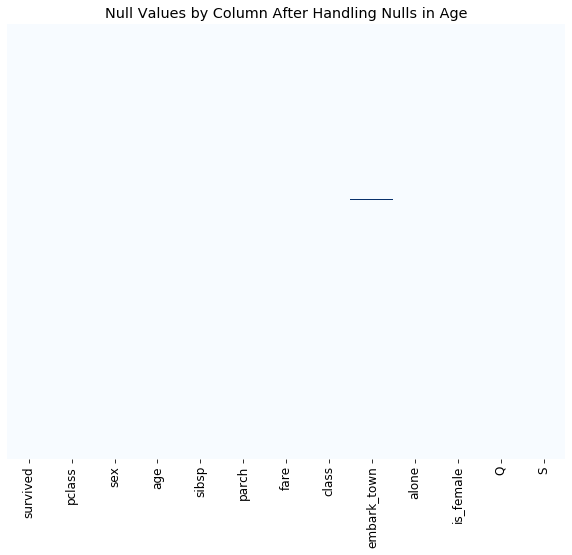

In [18]:
# Validate that our fill was successful.

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column After Handling Nulls in Age')
plt.show()

___

#### `.SimpleImputer()`

We can also use some more sophisticated techniques using sklearn. **Sklearn's SimpleImputer ONLY works on numeric columns.**

**Create the imputer; pick your strategy.**

```python
from sklearn.impute import SimpleImputer

imputer = sklearn.impute.SimpleImputer(strategy='mean')
```

**Fit the imputer to train dataframe.**

```python
imputer = imputer.fit(train[['column']])
```

**Use the Imputer on train, validate, and test dataframes and reassign to dataframes.**

```python
train[['column']] = imputer.transform(train[['column']])

validate[['column']] = imputer.transform(validate[['column']])

test[['column']] = imputer.transform(test[['column']])
```

___

#### What if our missing values are in a categorical column?

Here's one way you could handle this if without dropping observations.

```python
cat_mode = train['Label'].value_counts().index[0]

train['cat_column'] = train['cat_column'].fillna(cat_mode)

validate['cat_column'] = validate['cat_column'].fillna(cat_mode)

test['cat_column'] = test['cat_column'].fillna(cat_mode)
```

In [19]:
train['embark_town'].isnull().sum()

1

In [20]:
# Establish the mode categorical value using the train dataset.

embark_mode = train['embark_town'].value_counts().index[0]
embark_mode

'Southampton'

**Fill null values in `embark_town` in all datasets with `embark_mode` value; reassign to dataframes.**

In [21]:
train['embark_town'] = train['embark_town'].fillna(embark_mode)
validate['embark_town'] = validate['embark_town'].fillna(embark_mode)
test['embark_town'] = test['embark_town'].fillna(embark_mode)

In [22]:
# Validate our fill on train dataset.

train['embark_town'].isnull().sum()

0

___

### Encoding Techniques AFTER Splitting

#### `LabelEncoder()` 

**Create the Encoder Object.**

```python
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
```

**Fit and Transform train dataset and reassign.**

```python
train['col'] = le.fit_transform(train.col_to_encode)
```

**Transform validate and test datasets and reassign.**

```python
validate['col'] = le.transform(validate.col_to_encode)

test['col'] = le.transform(test.col_to_encode)
```

**Decode Your Encoded Column.**

```python
train['col'] = le.inverse_transform(train.col_to_decode)

validate['col'] = le.inverse_transform(validate.col_to_decode)

test['col'] = le.inverse_transform(test.col_to_decode)
```

___

#### `OneHotEncoder()`

**Create the OHE Object.**

```python
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, categories='auto')
```

**Fit and Transform train to create an array of values.**

```python
train_matrix = ohe.fit_transform(train[['col']])
```

**Transform validate and test to create arrays of values.**
```python
validate_matrix = ohe.transform(validate[['col']])

test_matrix = ohe.transform(test[['col']])
```

**Convert Arrays to dataframes of Encoded Columns.**

```python
train_ohe = pd.DataFrame(train_matrix, columns=ohe.categories_[0], index=train.index)

validate_ohe = pd.DataFrame(validate_matrix, columns=ohe.categories_[0], index=validate.index)

test_ohe = pd.DataFrame(test_matrix, columns=ohe.categories_[0], index=test.index)
```

**Join Your dataframes of Encoded Columns to your original dataframes.**

```python
train = train.join(train_ohe)

validate = validate.join(validate_ohe)

test = test.join(test_ohe)
```

<hr style="border-top: 10px groove dodgerblue; margin-top: 1px; margin-bottom: 1px"></hr>

## Exploring

<hr style="border-top: 10px groove dodgerblue; margin-top: 1px; margin-bottom: 1px"></hr>

![image.png](https://www.cambridgemaths.org/Images/E29-exploratory-data-analysis.jpg)

### **<font color=red>What is EDA (Exploratory Data Analysis)?</font>**

Exploratory Data Analysis involves learning more about the data you're working with. One reason to perform EDA is to visualize parts of the data to better understand the correlation between the features and the target.

**The preparation for your dataset for exploration may not be the same as the prepartion of your dataset for modeling.** The requirements of Machine Learning algorithms do not always overlap with the requirements for good data visualization or exploration.

___

### **<font color=orange>So What Types of Viz are best for exploring categorical vs continuous data?</font>**

How do you decide what chart to use? Should you aggregate your data to get a better view? Are you making a comparison or showing a relationship between variables? Do you want to display the distribution or composition of your dataset? These are important questions to ask yourself when deciding on types of chart to use and data aggregations for exploration.

Read more about how to choose a chart [here](https://eazybi.com/blog/data_visualization_and_chart_types/).

![image](https://www.mymarketresearchmethods.com/wp-content/uploads/2013/01/chart-types-choosing-the-right-one.png)

___

### <font color=green>Now What?</font>

**Below is a collection of some possibilities for exploring categorical and continuous values.** 

If you want more, check out [this article](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) showing 50 amazing matplotlib visualizations with code. It's organized by purpose of visualization objective, so it's easy to navigate, too.

___

#### `plt.rc()`

Set uniform chart and font sizes at the top of your notebook if you like.

```python
plt.rc('figure', figsize=(num, num))

plt.rc('font', size=num)
```

___

#### `sns.countplot()` subplots

Compare Categorical Values in `Embarked`using subplot Barplots.

In [23]:
train.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,is_female,Q,S
583,0,1,male,36.0,0,0,40.125,First,Cherbourg,1,0,0,0


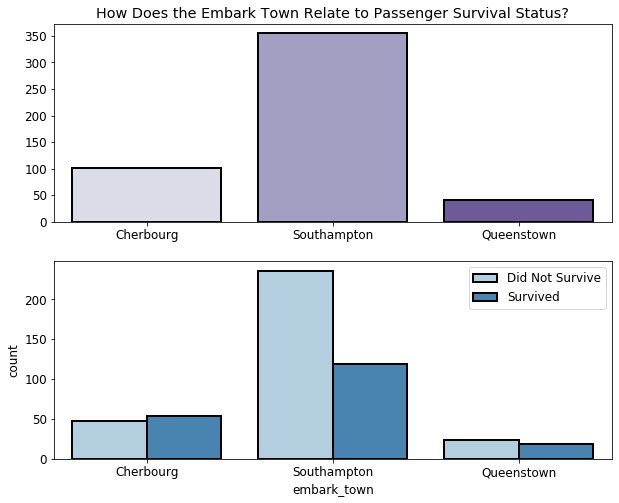

In [24]:
plt.subplot(211)

sns.countplot(x = 'embark_town', data=train, palette='Purples', ec='black', linewidth=2)

plt.title('How Does the Embark Town Relate to Passenger Survival Status?')
plt.xlabel('')
plt.ylabel('')

plt.subplot(212)

# use hue to add another dimension to your viz
sns.countplot(x = 'embark_town', hue = 'survived', data=train, palette='Blues', ec='black', linewidth=2)

plt.legend(['Did Not Survive', 'Survived'])

plt.show()

___

#### `sns.boxplot()`

Boxplots to show Distribution of Age by Sex and Survival

```python
sns.boxplot(x='categorical', y='continous', data=train , hue='categorical')
```

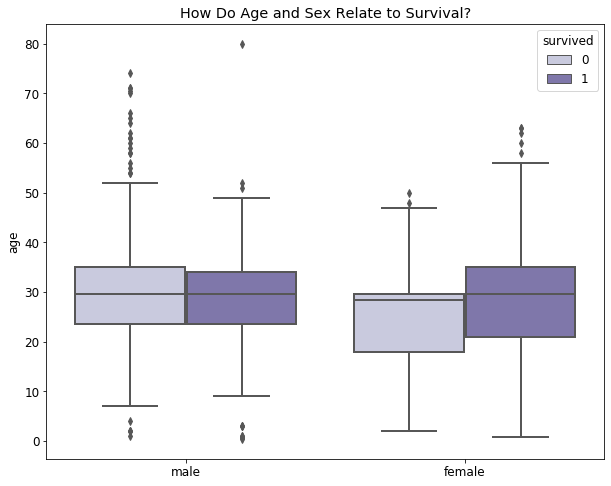

In [25]:
sns.boxplot(x='sex', y='age', data=train, hue='survived', palette='Purples', linewidth=2)

plt.title('How Do Age and Sex Relate to Survival?')
plt.xlabel('')
plt.show()

___

#### `sns.swarmplot()`

Swarmplots to show Distribution of a Continuous Variable grouped by Categorical Variables.

```python
sns.swarmplot(x='categorical', y='continous', data=train , hue='categorical'  )
```

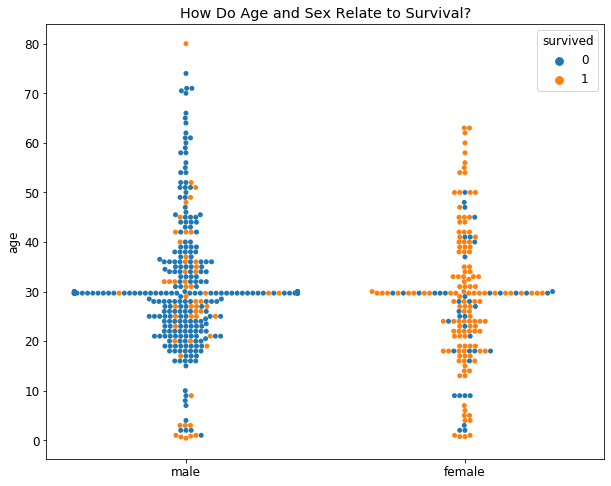

In [26]:
sns.swarmplot(x='sex', y='age', data=train , hue='survived'  )

plt.title('How Do Age and Sex Relate to Survival?')
plt.xlabel('')
plt.show()

___

#### `sns.violinplot()`

Violinplot Similar to Boxplots.

```python
sns.violinplot(x='categorical', y='continous', data=train , hue='categorical'  )
```

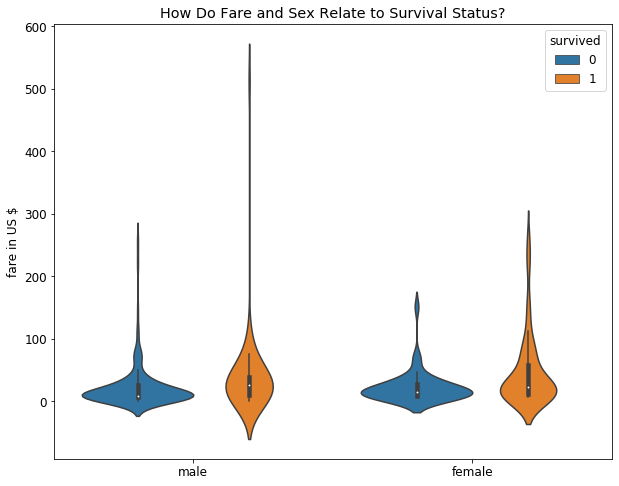

In [27]:
sns.violinplot(x='sex', y='fare', data=train , hue='survived'  )

plt.title('How Do Fare and Sex Relate to Survival Status?')
plt.xlabel('')
plt.ylabel('fare in US $')

plt.show()

___

#### `.hist()` subplots

Histogram Subplots to View Distribution of Fare by Survival Status.

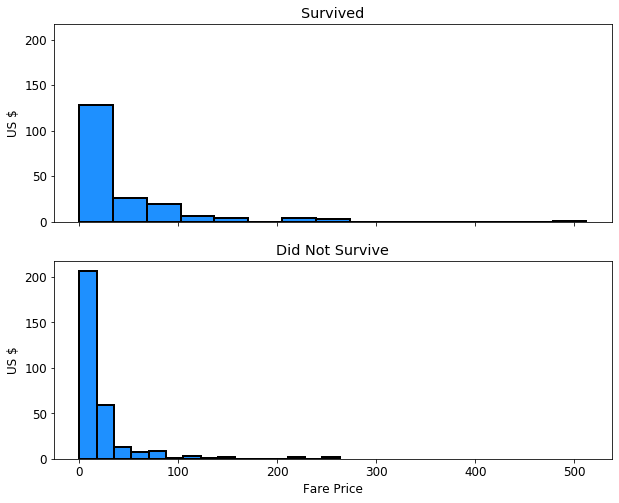

In [28]:
# Create figure and axes, 2 rows and 1 column, share x and y axes.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

# Plot first histogram from survived subset, fare variable.
ax1.hist(train[train.survived == 1].fare, bins=15, 
         color='dodgerblue', ec='black', linewidth=2)

ax1.set(title='Survived', ylabel='US $')

# Plot second historgram from did not survive subset, fare variable.
ax2.hist(train[train.survived == 0].fare, bins=15, 
         color='dodgerblue', ec='black', linewidth=2)

ax2.set(title='Did Not Survive', xlabel='Fare Price', ylabel='US $')

plt.show()

___

#### `pd.crosstab` with `sns.heatmap()`

Crosstab with Heatmap to Group Variables and Visualize Correlations.

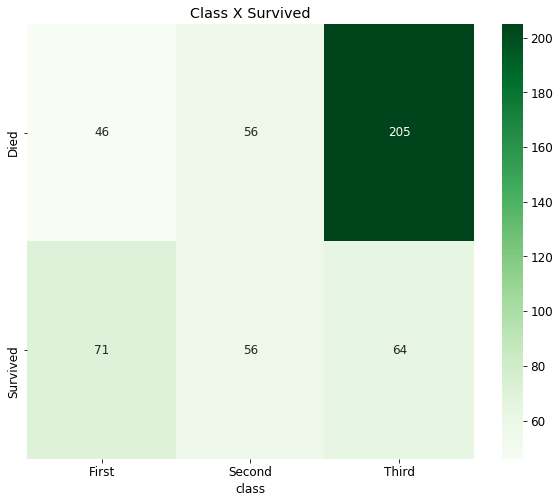

In [29]:
# Create crosstab with raw values.
ctab = pd.crosstab(train.survived, train['class'])

# Use crosstab object in a heatmap to visualize values.
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='d')

plt.title('Class X Survived')
plt.ylabel('')

# Change labels for y-tick marks.
locs, labels = plt.yticks()
plt.yticks(locs, ('Died', 'Survived'))

plt.show()

**Inspect percentages of overall population**

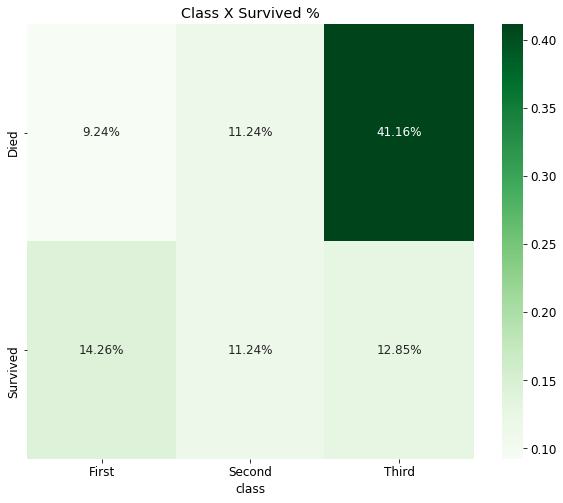

In [30]:
# Create crosstab with values as percentages of overall population
ctab = pd.crosstab(train.survived, train['class'], normalize=True)

# Use crosstab object in a heatmap to visualize values.
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.2%')

plt.title('Class X Survived %')
plt.ylabel('')

# Change labels for y-tick marks.
locs, labels = plt.yticks()
plt.yticks(locs, ('Died', 'Survived'))


plt.show()

___

### `.groupby()`

**Use a Groupby to Explore Different Aggregations of Your Data.**

The `.groupby()` here creates a Series with an index containing the categories present in the `Survived` column and the average fare price for each index category. 

>To inspect percentages by group, set `normalize=True`.

In [31]:
train.groupby('survived').fare.mean()

survived
0    22.953323
1    44.272688
Name: fare, dtype: float64

**Adding `.plot(kind='barh')` turns the index of your groupby into ylabels and the values into bar lengths.**

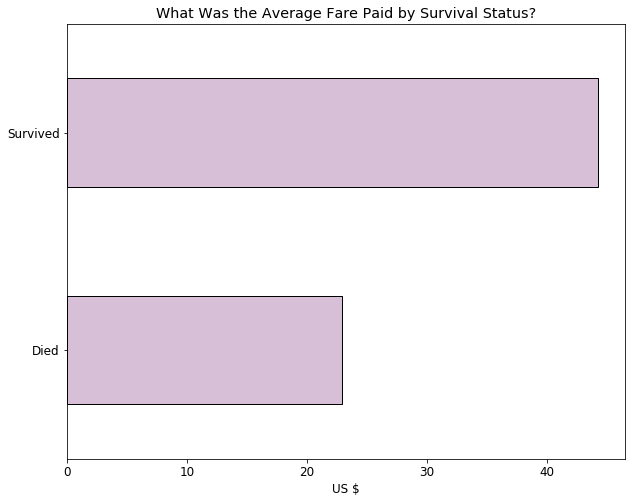

In [32]:
# Plot your groupby object quickly.
train.groupby('survived').fare.mean().plot(kind='barh', color='thistle', ec='black')

plt.title('What Was the Average Fare Paid by Survival Status?')

locs, labels = plt.yticks()
plt.yticks(locs, ('Died', 'Survived'))
plt.ylabel('')
plt.xlabel('US $')

plt.show()

___

**Below is such a useful code snippet to put in your back pocket!**

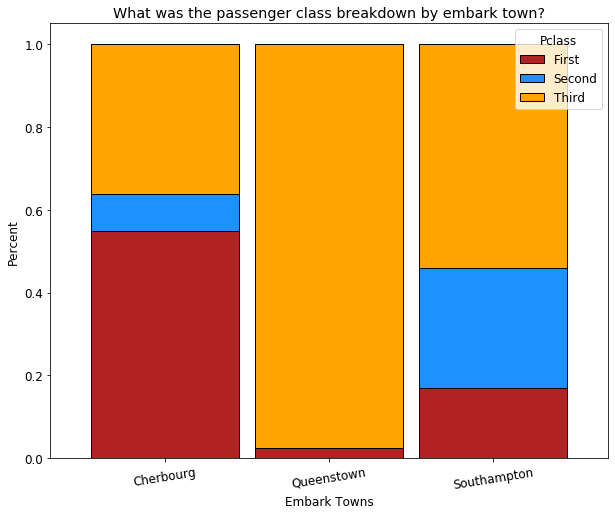

In [33]:
# custom aggregate to get value counts by group
(
train.groupby('embark_town')['class']

# turn an index into columns and create bar plot
    .apply(lambda s: s.value_counts(normalize=True))  
    .unstack()                                        
    .plot.bar(stacked=True, 
              width=.9, 
              color=['firebrick', 'dodgerblue', 'orange'], 
              ec='black')                 
)

plt.title('What was the passenger class breakdown by embark town?')

plt.xticks(rotation=9)
plt.xlabel('Embark Towns')
plt.ylabel('Percent')

plt.legend(title='Pclass')

plt.show()

___

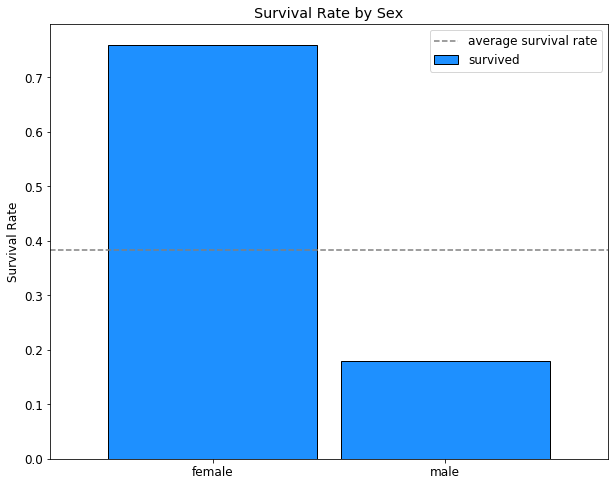

In [34]:
train.groupby('sex').survived.mean().plot.bar(ec='black', fc='dodgerblue', width=.9)

# plt.hlines(height, starts, ends) (is like y, xmin, xmax)
plt.hlines(train.survived.mean(), *plt.xlim(), ls='--', color='grey', label='average survival rate')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Survival Rate')

plt.title('Survival Rate by Sex')
plt.legend()
plt.show()

___

### `pd.crosstab()` and `pd.pivot_table()` with `sns.heatmap()`

Exploring 2 Different Categorical Values

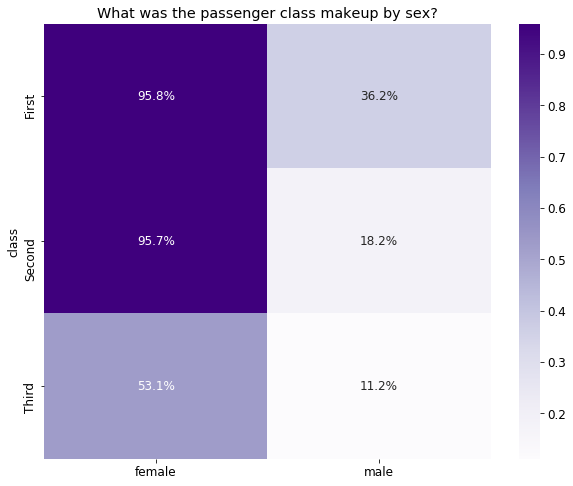

In [35]:
train.groupby(['class', 'sex']).survived.mean()

ctab = pd.crosstab(train['class'], train.sex, values=train.survived, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.1%')

plt.title('What was the passenger class makeup by sex?')
plt.xlabel('')

plt.show()

OR
```python
       df.pivot_table(values,  rows,   columns)
 ```

In [36]:
table = train.pivot_table('survived', 'class', 'sex')
table

sex,female,male
class,,
First,0.958333,0.362319
Second,0.956522,0.181818
Third,0.530864,0.111702


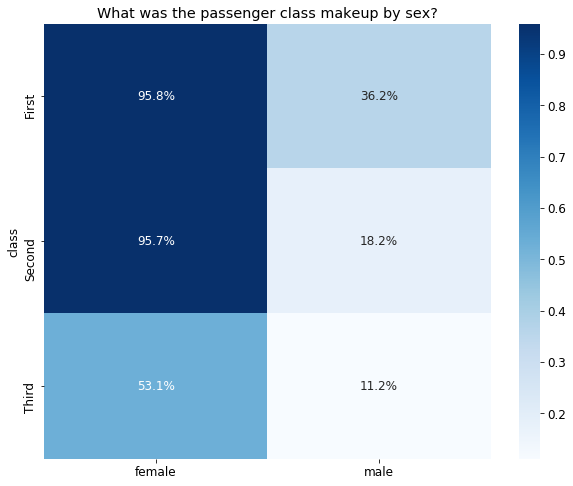

In [37]:
sns.heatmap(table, annot=True, cmap='Blues', fmt='.1%')

plt.title('What was the passenger class makeup by sex?')
plt.xlabel('')

plt.show()

___

#### `pd.cut()` and `pd.qcut()`

**I can use binning for exploration.** 

```python
# for even intervals but not evenly distributed values in each bin
pd.cut(df.column, bins=[], labels=[])   

# for even number of observations in each interval
pd.qcut(df.column, bins=[], labels=[])
```

Here I turn a continuous variable into a categorical one for visiualizing.

In [38]:
# splits age into 2 bins, 0-12 and 13-80

train['age_group'] = pd.cut(train.age, bins = [0, 12, 80], labels=['child', 'adult'])
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,is_female,Q,S,age_group
583,0,1,male,36.000000,0,0,40.1250,First,Cherbourg,1,0,0,0,adult
165,1,3,male,9.000000,0,2,20.5250,Third,Southampton,0,0,0,1,child
50,0,3,male,7.000000,4,1,39.6875,Third,Southampton,0,0,0,1,child
259,1,2,female,50.000000,0,1,26.0000,Second,Southampton,0,1,0,1,adult
306,1,1,female,29.678105,0,0,110.8833,First,Cherbourg,1,1,0,0,adult


In [39]:
# inspect survival rate of children and adults

train.groupby('age_group').survived.value_counts(normalize=True)

age_group  survived
child      1           0.542857
           0           0.457143
adult      0           0.628510
           1           0.371490
Name: survived, dtype: float64

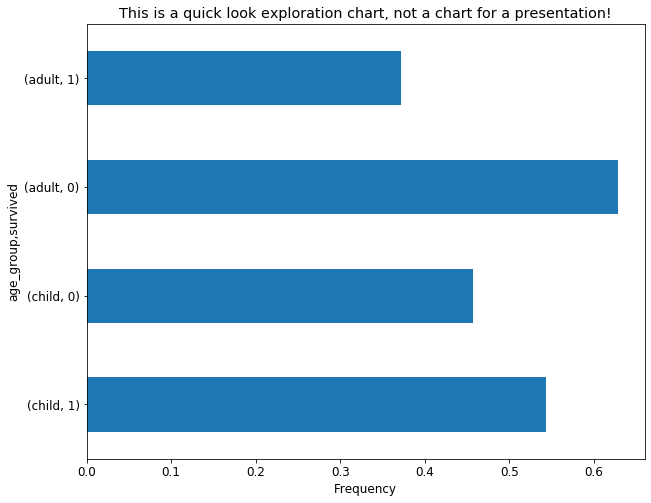

In [40]:
# visualize the above code

train.groupby('age_group').survived.value_counts(normalize=True).plot(kind='barh')

plt.title('This is a quick look exploration chart, not a chart for a presentation!')
plt.xlabel('Frequency')
plt.show()

<div class="alert alert-block alert-warning"><b>Remember: </b>If I want to use this new feature in modeling, I have to perform this same manipulation from above on both validate and test. If I were going to do this, I would build these into my prepare function. If I don't, when I drop this column before modeling, I only need to drop it from my train dataset.</div>

___

**There's some pretty cool EDA code and explanation in [this article.](https://towardsdatascience.com/exploratory-data-analysis-for-linear-regression-classification-8a27da23debc) Check it out!**

**Here are the official matplotlib [tutorials](https://matplotlib.org/3.1.1/tutorials/index.html#introductory)**

___

#### Subplots Using Simple pyplot Code

```python
# figure 1 of 2; everything up until the next subplot is on the first plot
plt.subplot(211) 

plt.plot(x, y)

plt.show()

# figure 2 of 2
plt.subplot(212)

plt.plot(y, x)

plt.show()
```

___

#### Subplots Using Matplotlib Object-Oriented API

A figure in matplotlib is divided into two different objects:

- The Figure Class: It can contain one or more axes objects.

- The Axes Object: It represents one plot inside of a figure object.

```python
# create figure and axes -> subplots(nrows, ncols)

fig, axes = plt.subplots(2,1)

# plot 1 of 2
axes[0].plot(x, y)

# set components of axes 1/plot 1
axes[0].set(title='My Title')

# plot 2 of 2
axes[1].plot(y, x)

# set components of axes 2/plot 2
axes[1].set(title='My Title')

# manipulate labels of x-ticks
axes[1].set_xticklabels()

# auto-adjust layout
fig.tight_layout()
```

___

**Glossary for Matplotlib Figures**

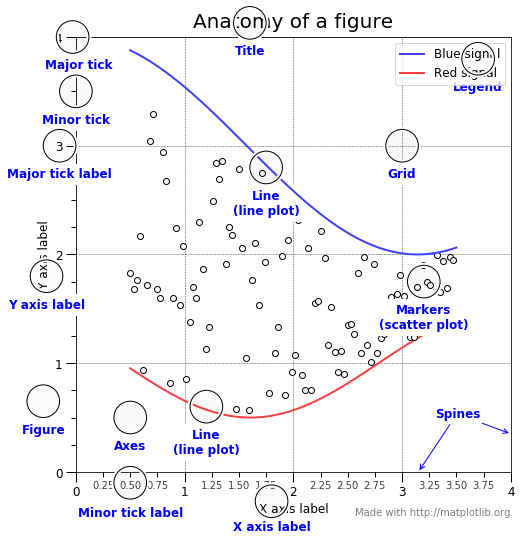

In [41]:
anatomy_of_a_figure()

___

**I'm ready to build my first model; I'm going to build a simple MVP Logistic Regression Model and see if I can beat my baseline accuracy.**

<hr style="border-top: 10px groove crimson; margin-top: 1px; margin-bottom: 1px"></hr>

## Modeling

<hr style="border-top: 10px groove crimson; margin-top: 1px; margin-bottom: 1px"></hr>

### <font color=red>What is a Logistic Regression Model?</font>

- **A Logistic Regression Model** maps any real value into a number between 0 and 1 representing the probability that an observation is in the positive class.

- **Overall**, makes a great baseline model because of the quick and easy implementation and ease of interpretation.

- **Pros:** Easy to interpret, fast to train and predict making this a great first classification model to try.

- **Cons:** Not as interpretable as showing a picture like a Decision Tree Classifier, assumption that the X predictors are independent, multi-class classification gets more complicated to interpret and explain

___

### <font color=orange>So What?</font>

- Both Scikit-Learn and Statsmodels can be used to create and evaluate Logistic Regression Classifiers.


- When we have a multiclass classifier, the coefficients of the X variables can inform us of their importance. 


- Our predictions are a number between 0 and 1 informing us of the probability that an observation is in the positive class.


- We can set a threshold to 'snap' our probabilities to a 0 or 1, not a member of our positive class or member of the positive class respectively.


- As you decrease your threshold, the Recall of your model increases. This is a good idea when you want to decrease your Type II errors or False Negatives. When it's more costly to miss a positive, you might decrease your threshold a bit.


- As you increase your threshold, the Precision of your model increases. This is a good idea when you want to decrease your Type I errors or False Positives. When it's more costly to falsely identify an observation as a positive case that is actually a negative case, you might want to increase your threshold a bit.

___

### <font color=green>Now What?</font>

Now I need to create a Baseline to compare my models to. Then, I'll create my first Logistic Regression Model; if its accuracy is better than my baseline, then I'll evaulate it.

___

### Baseline 

**Predicting the most common case for everything.**

62% of the observations did not survive. So, if you predict all of your observations did not survive, your baseline will predict its target correctly 62% of the time, or in other words, **your baseline accuracy is 62%.** If your model doesn't predict correctly more than 62% of the time, your model doesn't add value.

In [42]:
train.survived.value_counts(normalize=True)

0    0.616466
1    0.383534
Name: survived, dtype: float64

___

#### Define X and y

In [43]:
# I will decide here what my X variables will be; my y is `survived`, my target.

train.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,is_female,Q,S,age_group
583,0,1,male,36.0,0,0,40.125,First,Cherbourg,1,0,0,0,adult


In [44]:
# I will drop any remaining categorical features I have left.

X_train = train.drop(columns=['survived', 'sex', 'class', 'embark_town', 'age_group'])
y_train = train[['survived']]

X_validate = validate.drop(columns=['survived','sex', 'class', 'embark_town'])
y_validate = validate[['survived']]

X_test = test.drop(columns=['survived','sex', 'class', 'embark_town'])
y_test = test[['survived']]

In [45]:
# One last check of my data; all of my columns need to be numeric

X_train.head(1)

,pclass,age,sibsp,parch,fare,alone,is_female,Q,S
583,1,36.0,0,0,40.125,1,0,0,0


In [46]:
# This is my target variable, my label.

y_train.head(1)

,survived
583,0


___

### Create Logistic Regression Model

In [47]:
# Create a simple Logistic Regression model to start.

logit = LogisticRegression(random_state=123)

##### Fit the Logistic Regression Model

In [48]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Print the coefficients and intercept of the model

In [49]:
print(f'Columns: {X_train.columns}\n')
print(f'Coefficient: {logit.coef_}\n')
print(f'Intercept: {logit.intercept_}\n')

Columns: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'is_female', 'Q',
       'S'],
      dtype='object')

Coefficient: [[-1.18971499e+00 -3.56146280e-02 -5.18819408e-01 -1.48130530e-01
  -9.39922926e-04 -6.59951184e-01  2.72614345e+00  7.89591377e-01
   7.16839055e-02]]

Intercept: [2.79501842]



<hr style="border-top: 10px groove darkviolet; margin-top: 1px; margin-bottom: 1px"></hr>

## Evaluating

<hr style="border-top: 10px groove darkviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What Are Evaluation Metrics for Classification Models?</font>**

There are different metrics we can use to understand how well our classification model is predicting. Context will guide you toward the most valuable metric for your particular situation.

![image.png](https://i.stack.imgur.com/LIWH1.jpg)

----

>**Accuracy:** This tells you how often your classifier is **predicting correctly overall**. 

This is the ratio of all of your correct predictions over all of your observations. 

(Total Number Correct / Total Number of Data Points) -> (TP + TN / TP + TN + FP + FN)

----

>**Recall:** The Recall score (**True Positive Rate or Sensitivity**) tells you how often your classifier is catching the positive cases in your dataset. It describes how good the model is at predicting the positive class when the actual outcome is positive. In other words, Recall tells you what percentage of the time your model is identifying the relevant instance in your dataset.

You have to decide which is more important in your situation. Is it more expensive in your specific context to miss a positive instance? If so, optimize for Recall.

**<font color=green>The Higher the Recall Score == The better your Classifier is at catching the actual positive cases in your dataset.</font>**

**<font color=red>The Lower the Recall Score == The more your Classifier is making Type II Errors / Misses / False Negatives.</font>**

(Total Number of Correct Positive Predictions / Total Number of Actual Positive Observations in Dataset) -> (TP / TP + FN)

----

>**Precision:** The Precision score tells you how often your model was able to **predict positives correctly.** In other words, precision is the proportion of observations your model predicts to be relevant that were actually relevant and not false alarms or false positives.


**<font color=green>The Higher the Precision Score == The better your Classifier is at Predicting Positives Precisely in your dataset.</font>**

**<font color=red>The lower the Precision Score == The more your Classifier predicted a lot of positives where there were none, False Positives / Type I Errors / False Alarms</font>**

- If your model's Precision score goes up, the cost is that your model's Recall score goes down. You have to decide which is more important in your situation. Is it better to predict a False Positive instance than to miss a Positive instance? If so, optimize for precision.

(Total Number of Correct Positive Predictions / Total Number of Observations Predicted as Postive by Model) -> (TP / TP + FP)

----

>**f1-score:** The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better when you are looking to optimize for both Recall and Precision.

----

>**ROC Curve:** The Receiver Operating Characteristic Curve (ROC Curve) summarizes the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. ROC curves are appropriate when the observations are balanced between each class in a binary classification problem.

![image.png](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png)

- It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

----

**To evaluate the performance of your classification model, you can also create a Confustion Matrix. We'll do this in a bit.**

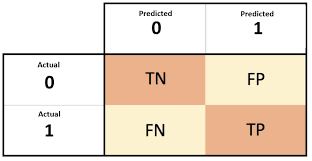

### <font color=orange>So What If...?</font>

___

#### Recall in Context


- If your Recall score is high, your model didn’t miss a lot of positives; it's good at catching positive instances.

>For example, if your model is predicting positive for churn and your Recall score is high, your model is good at identifying customers who are positive for churn or actually churning.

- As your Recall score gets lower, your model is not predicting more of the positives that are actually there; you are missing Positive observations.

>For example, if your model is predicting positive for churn and your Recall score is low, your model is not good at identifying customers who are churning. It is predicting a lot of False Negatives; you are missing the opportunity to find and woo customers who are going to churn. These are Misses, missed opportunities to identify and keep customers who are actually positive for churn. **These are Type II Errors**

**You want to optimize for recall when missed positives (False Negatives) are expensive.**

___

#### Precision in Context

- The higher your precision score is, the better your model is at **Predicting Positives Precisely!** It avoids predicting a lot of False Positives but it is missing more of the Actual Positives, too. 


- As your Precision score gets lower, your model predicted a lot of False Postives or positives where there were none. These are **Type I Errors.**

**You want to optimize for Precision when False Positives are more expensive than False Negatives.**

___

### <font color=green>Now What?</font>

#### Create Evaluation DataFrame

In [50]:
# Create eval_df and rename the train survived column actual.
train_eval_df = train[['survived']].rename(columns={'survived': 'actual'})

# Predict whether a passenger will survive using the X_train data; add column to eval_df
train_eval_df['yhat'] = logit.predict(X_train)

# Estimate the probability of a passenger surviving using the X_train data; add col to eval_df

train_eval_df['probs'] = logit.predict_proba(X_train)[:, 1]

train_eval_df.head()

,actual,yhat,probs
583,0,0,0.407457
165,1,0,0.207752
50,0,0,0.038700
259,1,1,0.779046
306,1,1,0.924861


___

#### Create evaluation DataFrame for validate dataset

In [51]:
# Create eval_df and rename survived column actual.
val_eval_df = validate[['survived']].rename(columns={'survived': 'actual'})

# Predict whether a passenger will survive using the training data; add column to eval_df
val_eval_df['yhat'] = logit.predict(X_validate)

# Estimate the probability of a passenger surviving using the training data; add col to eval_df

val_eval_df['probs'] = logit.predict_proba(X_validate)[:, 1]

val_eval_df.head()

,actual,yhat,probs
610,0,0,0.342058
424,0,0,0.116145
568,0,0,0.076009
334,1,1,0.937128
101,0,0,0.081153


___

#### Accuracy Score

In [52]:
logit.score(X_train, y_train)

0.8132530120481928

___

#### Recall Score

In [53]:
recall_score(train_eval_df.actual, train_eval_df.yhat, average=None)

array([0.8762215 , 0.71204188])

___

#### Precision Score

In [54]:
precision_score(train_eval_df.actual, train_eval_df.yhat, average=None)

array([0.83024691, 0.7816092 ])

___

#### Confusion Matrix

In [55]:
cm = confusion_matrix(y_true=train_eval_df.actual, y_pred=train_eval_df.yhat)
cm

array([[269,  38],
       [ 55, 136]])

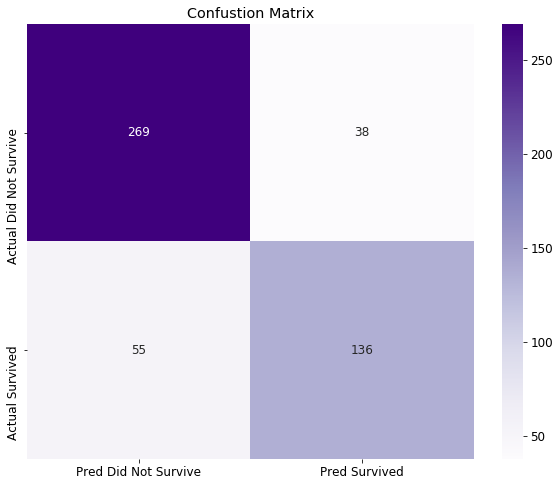

In [56]:
xlabels=['Pred Did Not Survive', 'Pred Survived']
ylabels=['Actual Did Not Survive', 'Actual Survived']

sns.heatmap(cm, annot=True, fmt="d", cmap='Purples', 
            xticklabels=xlabels, yticklabels=ylabels)

plt.title('Confustion Matrix')
plt.show()

OR

In [57]:
pd.crosstab(index=train_eval_df.actual, 
            columns=train_eval_df.yhat, 
            rownames=['Actual'], 
            colnames=['Predicted'])

Predicted,0,1
Actual,,
0,269,38
1,55,136


___

#### Classification Report

In [58]:
# My LR model is beating my baseline accuracy at predicting my target value, survived.

print(classification_report(y_true=train_eval_df.actual, y_pred=train_eval_df.yhat))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       307
           1       0.78      0.71      0.75       191

    accuracy                           0.81       498
   macro avg       0.81      0.79      0.80       498
weighted avg       0.81      0.81      0.81       498



___

In [59]:
# I can try this model on out-of-sample data using my validate dataset.

print(classification_report(y_true=val_eval_df.actual, y_pred=val_eval_df.yhat))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       132
           1       0.74      0.66      0.70        82

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.78      0.78      0.78       214



### Takeaways from MVP Logistic Regression Model Evaluation

- My accuracy drops from 81% on my train dataset to 78% on my validate dataset.

- I would now go back and probably try a Decision Tree model to see if I can beat this simple LR model.

- I'm not going to test this model until I know if I can beat it with another type of Classification Algorithm.

<hr style="border-top: 10px groove silver; margin-top: 1px; margin-bottom: 1px"></hr>

## Conclusions

- At this point, I have a Logistic Regression Model that is beating my baseline accuracy by almost 20%. This model has value!

- If I have time, I can go back and tweak the hyperparameters to tune my model. 

- I can also try other types of Classification models from here, and see which one predicts the best on unseen (out-of-sample) data by using the validate dataset.

- Finally, I will evaulate my best model on unseen (out-of-sample) data by using the test dataset.